Generate a file "dati_2.txt" containing 10,000 events distributed according to a Gaussian probability distribution.

Write a program that fits the events saved in the file "dati_2.txt" using the binned and unbinned maximum likelihood methods, and compare the results of the two techniques.

In [84]:
import numpy as np

import spl.generate

data = spl.generate.list_clt_ms(1., 0.7, 10000)
np.savetxt("data/dati_2.txt", data)

In [85]:
from iminuit import Minuit
from math import floor, ceil
from iminuit.cost import BinnedNLL
from iminuit.cost import UnbinnedNLL
from matplotlib import pyplot as plt
from scipy.stats import norm

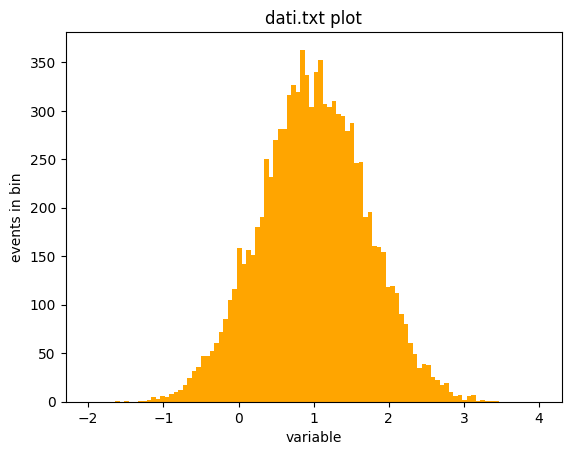

In [86]:
bin_content, bin_edges = np.histogram(data, bins=(floor(len(data)/100)), range=(floor(min(data)), ceil(max(data))))

sample_mean = np.mean(data)
sample_sigma = np.std(data)

fig, ax = plt.subplots()
ax.set_title("dati.txt plot")
ax.set_xlabel('variable')
ax.set_ylabel('events in bin')
ax.hist(data, bins=bin_edges, color="orange")
plt.show()

In [87]:
def cdf(bin_edges, mu, sigma):
    return norm.cdf (bin_edges, mu, sigma)

def pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

Binned

In [88]:
my_cost_func_1 = BinnedNLL(bin_content, bin_edges, cdf)

N_events = sum(bin_content)

my_minuit_1 = Minuit (my_cost_func_1, 
                    mu = sample_mean, sigma = sample_sigma)

my_minuit_1.limits['sigma'] = (0, None)

my_minuit_1.migrad()
my_minuit_1.minos()
display(my_minuit_1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 77.99 (χ²/ndof = 0.8)      │              Nfcn = 72               │
│ EDM = 1.97e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.999   │   0.007   │   -0.007   │   0.007    │         │         │       │
│ 1 │ sigma │   0.703   │   0.005   │   -0.005   │   0.005    │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.007   │   0.007   │  -0.005   │   0.005   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 4.95e-05        0 │
│ sigma │        0 2.48e-05 │
└───────┴───────────────────┘

Unbinned

In [89]:
my_cost_func_2 = UnbinnedNLL(data, pdf)

my_minuit_2 = Minuit (my_cost_func_2, 
                      mu = sample_mean, sigma = sample_sigma)

my_minuit_2.limits['sigma'] = (0, None)

my_minuit_2.migrad()
my_minuit_2.minos()
display(my_minuit_2)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.134e+04                  │              Nfcn = 58               │
│ EDM = 1.69e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.999   │   0.007   │   -0.007   │   0.007    │         │         │       │
│ 1 │ sigma │   0.703   │   0.005   │   -0.005   │   0.005    │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.007   │   0.007   │  -0.005   │   0.005   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 4.95e-05        0 │
│ sigma │        0 2.47e-05 │
└───────┴───────────────────┘

Comparison

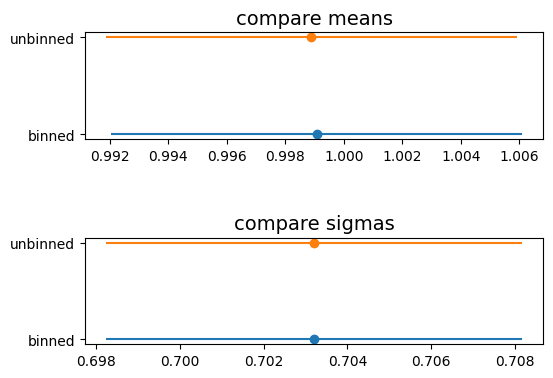

In [91]:
fig, axes = plt.subplots (2, 1)

# setting the two sub-figures apart
fig.tight_layout (pad=5.0)

# plot means
axes[0].set_title ('compare means', size=14)
axes[0].errorbar (my_minuit_1.values[0], 'binned', xerr = my_minuit_1.errors[0], marker = 'o')
axes[0].errorbar (my_minuit_2.values[0], 'unbinned', xerr = my_minuit_2.errors[0], marker = 'o')

#plot sigmas
axes[1].set_title ('compare sigmas', size=14)
axes[1].errorbar (my_minuit_1.values[1], 'binned', xerr = my_minuit_1.errors[1], marker = 'o')
axes[1].errorbar (my_minuit_2.values[1], 'unbinned', xerr = my_minuit_2.errors[1], marker = 'o')

plt.show ()